# GPU or CPU check - pytorch

Prior to entering, many people use gpu for deep learning.

Check the gpu is working normally by below code.

If your gpu works, cuda is printed, or not cpu is printed.

I recommend you to use gpu for deep learning.

In [10]:
import torch
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print(DEVICE)

cuda


# After check your GPU is working now
# Let's understand the basic concepts.

I have the x, y data like below.
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

### What is the y_data, if my x_data is 4 or something?

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]



#### In the basic algebra, you can make the equation like below

$$
 y = wx + b
$$

#### And we can solve the equation by put the x and get the a, b.

#### But how can we solve this equation in deep learning area?

#### It can be solved by prediction with get the smallest loss.

$$
loss = (\hat{y} - y)^2
$$
$$ 
MSE = \frac{1}{n}\sum_{n=1}^N (\hat{y_n} - y_n)^2
$$


#### Let's see the below code and find the smallest loss.

In [12]:
def forward(x):
    return x * w
def loss(x, y):
    y_prediction = forward(x)
    return (y_prediction - y) * (y_prediction - y)

range_ = np.arange(0.0, 4.1, 0.5)
MSE = []

    
   

In [13]:
for w in range_:
    print("w is ", w)
    loss_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        loss_val = loss(x_val, y_val)
        loss_sum += loss_val
    MSE.append(loss_sum / len(x_data))

w is  0.0
w is  0.5
w is  1.0
w is  1.5
w is  2.0
w is  2.5
w is  3.0
w is  3.5
w is  4.0


#### By this code, we got the MSE according to a.
#### Let's see the below graph, can you find the smallest loss?
I can find the smallest loss in w = 2.0

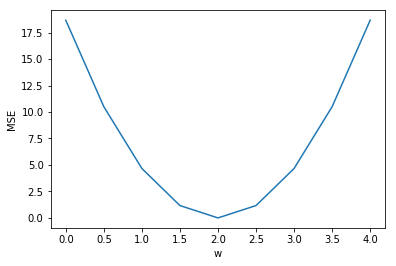

In [14]:
plt.plot(range_, MSE)
plt.ylabel('MSE')
plt.xlabel('w')
plt.show()

# Next let's do a prediction by using Gradeint descent algorithm

We can start w value in any place, so the important thing is choose our direction of moving.

If we are in positive position of the pole of the graph, we have to move negative direction.
Beacuse gradient is positve in right side of the pole.
Else we have to move positve direction.

In the loss equation, 
$$
loss = (\hat{y} - y)^2 = (x*w -y)^2
$$

$$
w = w - \alpha\frac{dloss}{dw} = w - \alpha * 2x(xw -y )
$$


In [15]:
def gradient(x, y):
    return 2*x*(x*w - y)

alpha = 0.01 # As you can know alpha is a learning rate -> change it to pracice!.
            # If you set higher value of alpha, its convergence speed is very fast.
            # Else you set lower value of alpha, its convergence speed is slow.
for epoch in range(10):
    for x_val, y_val in zip(x_data, y_data):
        grad = gradient(x_val, y_val)
        w = w - alpha * grad
        
        loss_val = loss(x_val, y_val)
    print("Epoch  = ", epoch, "/9 w = ", round(w), "loss = ", loss_val)  

Epoch  =  0 /9 w =  3.0 loss =  19.676960400383997
Epoch  =  1 /9 w =  3.0 loss =  10.755076961063336
Epoch  =  2 /9 w =  3.0 loss =  5.878533985164606
Epoch  =  3 /9 w =  3.0 loss =  3.2131022343998725
Epoch  =  4 /9 w =  2.0 loss =  1.7562245952408806
Epoch  =  5 /9 w =  2.0 loss =  0.9599211615204248
Epoch  =  6 /9 w =  2.0 loss =  0.5246758522979996
Epoch  =  7 /9 w =  2.0 loss =  0.28677849913070713
Epoch  =  8 /9 w =  2.0 loss =  0.1567480325299029
Epoch  =  9 /9 w =  2.0 loss =  0.08567568969247186


### This work refers to kim sung's youtube pytorch lecture.
